<a href="https://colab.research.google.com/github/cpvivek/Coronary-Heart-Disease-Risk-Prediction/blob/main/Capstone_Project_ML_Classification_Cardiovascular_Disease_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project: Classification - Cardiovascular disease risk prediction. 

The objective of the project would be to predict whether a patient is under risk of contracting coronory heart disease (CHD) in the next 10 years, given the data about following 14 attributes:


• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

We have over 4000 data entries to help develop our model. 


#Dataset

Let's look into the data we have in hand.

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#reading csv file
df=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Capstone Projects/Capstone_ML_Classification_Cardiovascular risk/cardiovascular_risk.csv')

In [6]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
df.shape

(3390, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

We can see some null values in the dataset which needs to be dealt with.

In [9]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#Null value clean-up

Following are the fields null values were detected in:

1. education: Categorical variable, indicating the level of education:

  1=0-11 years

  2=High School Diploma, GED

  3=Some College, Vocational School

  4=College (BS, BA) degree or more

  Null values shall be replaced with mode

2. cigsPerDay: Continuos variable indicating number of cigarettes smoked in a day. Null values shall be replaced by median.

3. BPmeds: Categorical Field (0/1) indicating use of Anti-hypertensive medication at exam. If the value is missing here, we shall assume that the patient isn't under the medication. 

4. totChol: Continuos variable indicating Serum Total Cholesterol (mg/dL). Null values shall be replaced with median here.

5. BMI: Contiuos variable indicating BMI of the patient. Null values shall be replaced by median.

6. heartrate: Continuos variable indicating heart rate (Ventricular rate) in
beats/min. Null values to be replaced by median.

7. glucose: Continuous variable indicating Casual serum glucose (mg/dL). Null values to be replaced by median.

In [10]:
#replacing NaN values appropriately.
df['education'].fillna(1,inplace=True)
df['cigsPerDay'].fillna(df.cigsPerDay.median(),inplace=True)
df['BPMeds'].fillna(0,inplace=True)
df['totChol'].fillna(df.totChol.median(),inplace=True)
df['BMI'].fillna(df.BMI.median(),inplace=True)
df['heartRate'].fillna(df.heartRate.median(),inplace=True)
df['glucose'].fillna(df.glucose.median(),inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The dataset doesn't have null values anymore. We can proceed towards EDA now.

#EDA
Let's dive deep into the dataset to gain better understanding.

Let's have a pairplot overview of the dataset first

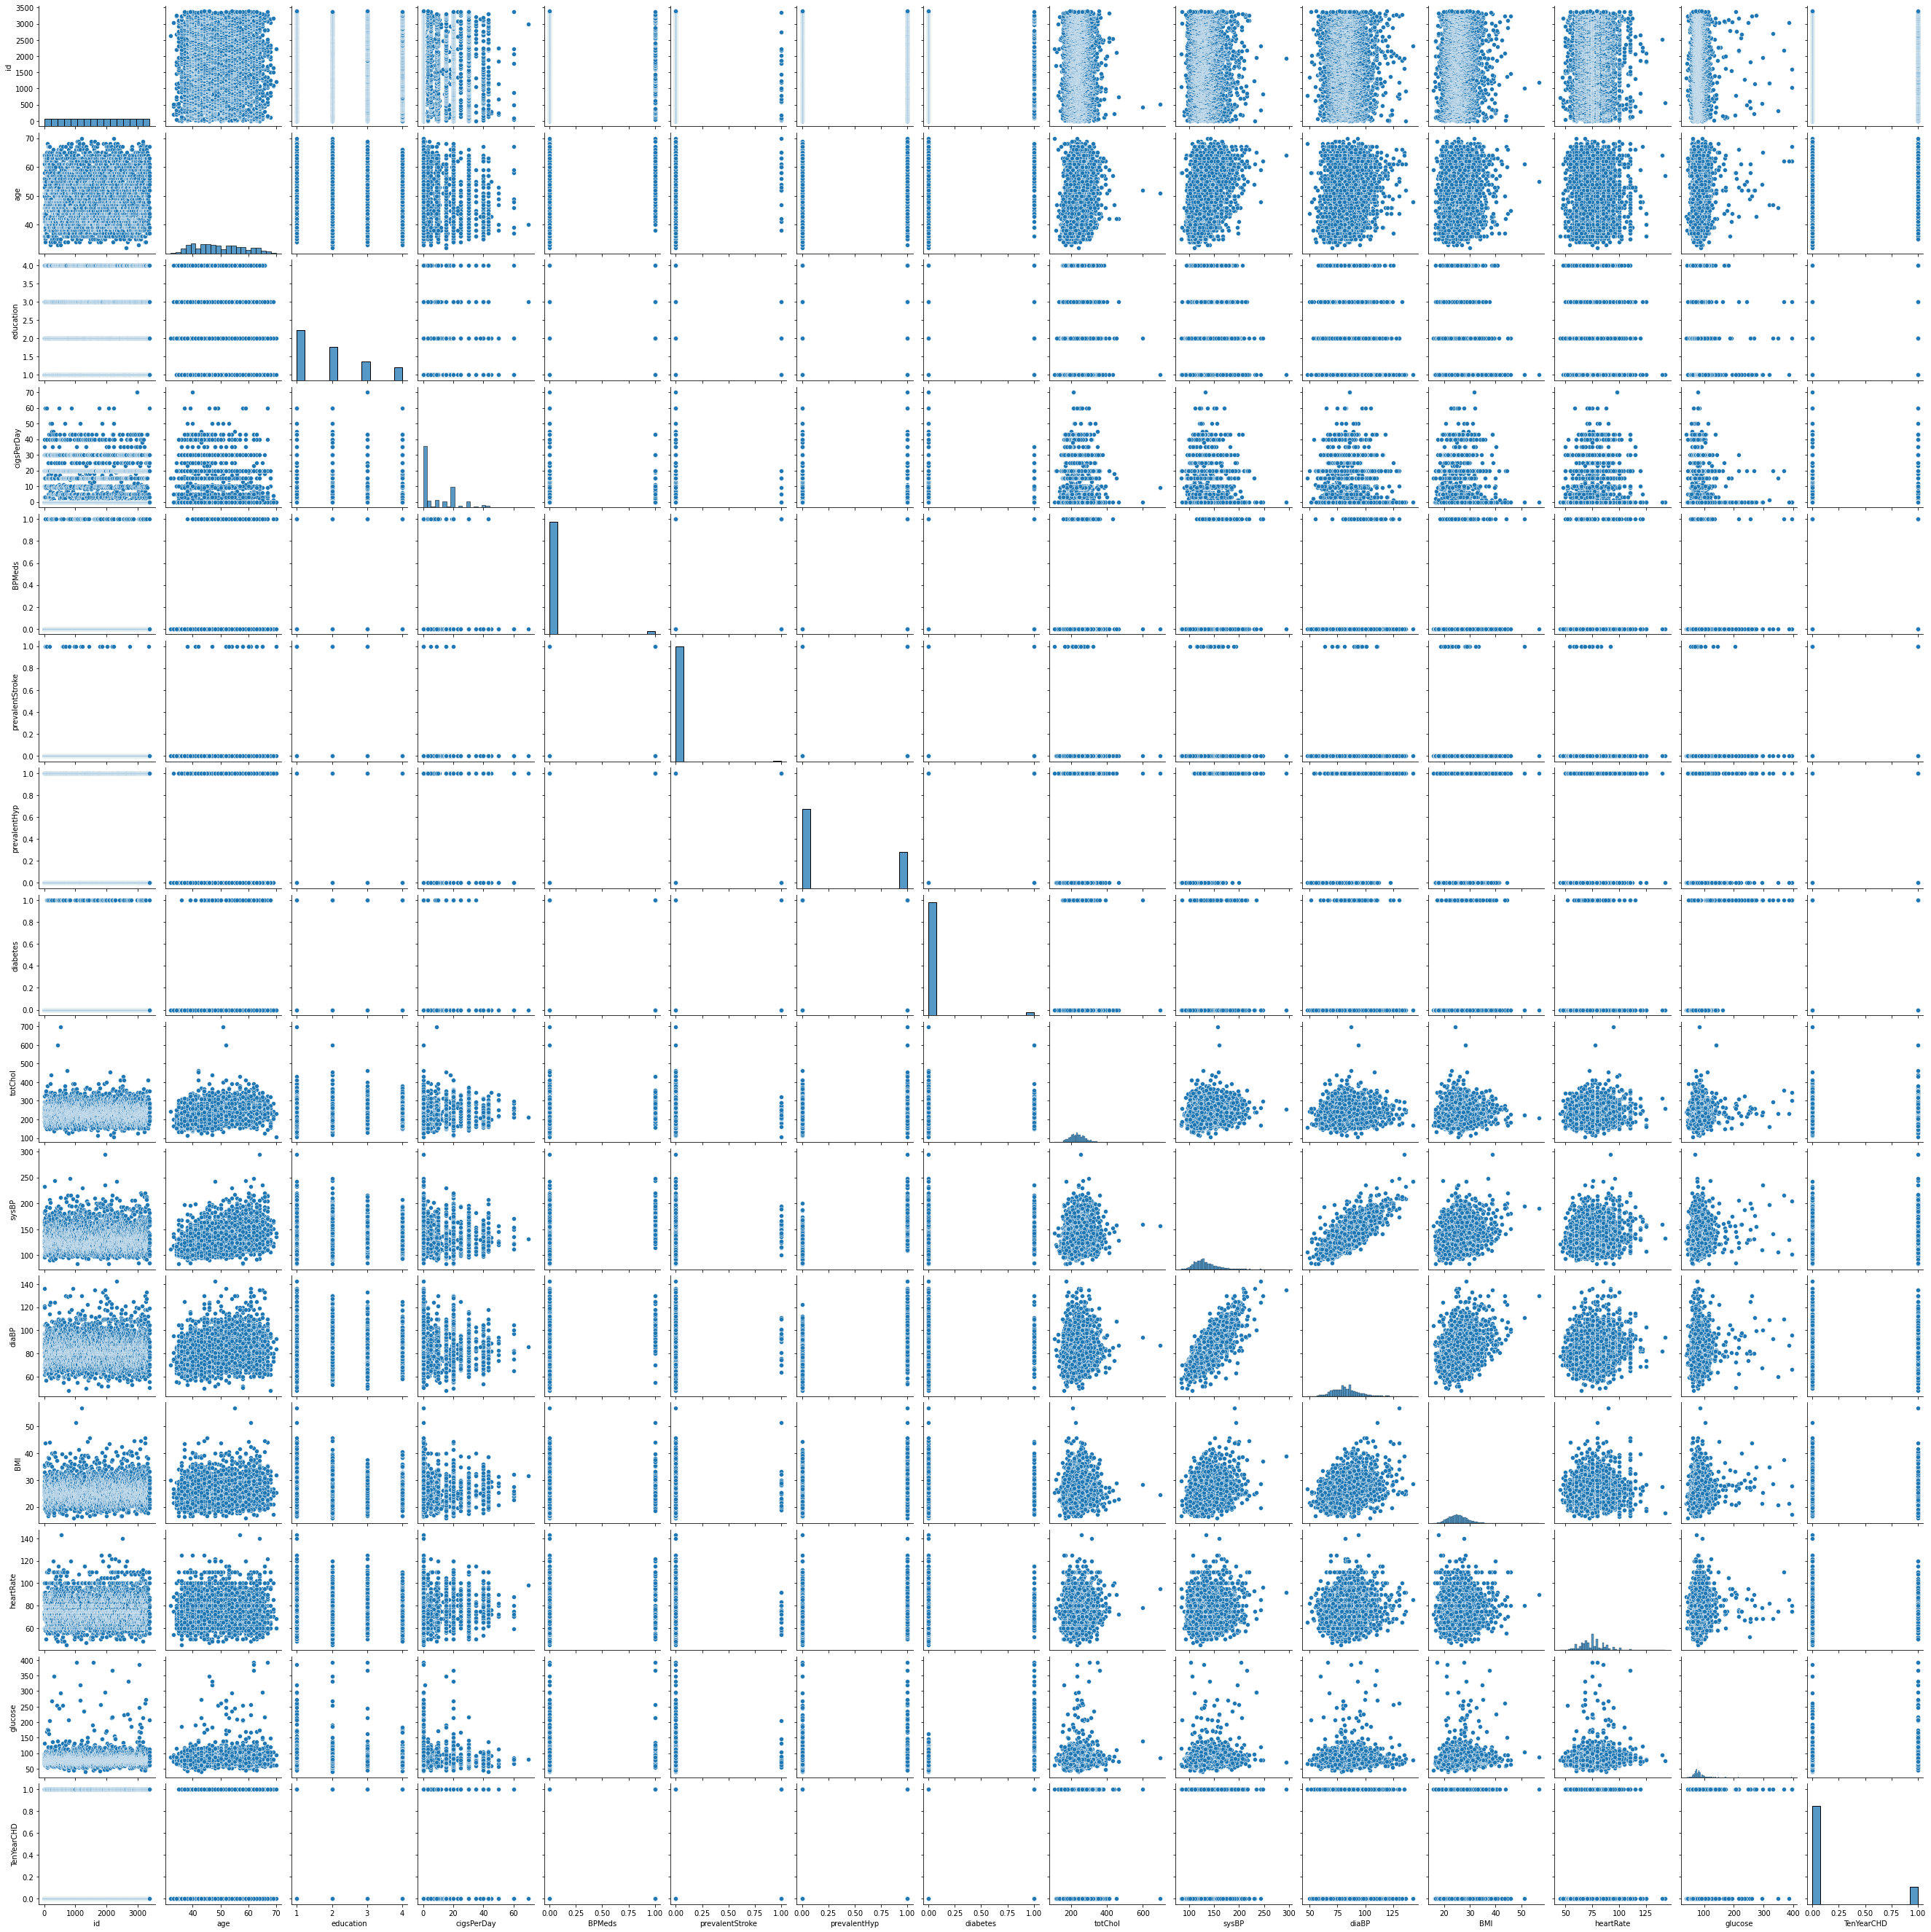

In [12]:
#plotting pairplot
sns.pairplot(df)
plt.show()

The pairplot can be used to look into relations between the features in the dataset.
Since this is quite messy here, let's look into features individualy.

##Value Counts of patients facing risk and not facing risk


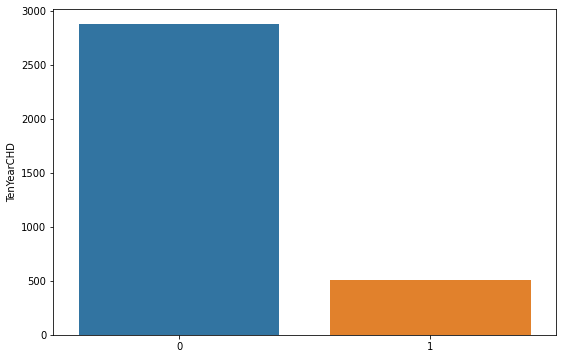

In [13]:
risk_count=df['TenYearCHD'].value_counts().reset_index()#forming a df with class value counts
plt.figure(figsize=(9,6))
sns.barplot(x=risk_count.index,y=risk_count.TenYearCHD)

We can observe a high imabalance between the two classes. We'll have to deal with this in later stage by over sampling the data.

## Distribution of active risk cases across ages. 

In [14]:
age_risk=df.groupby('age')['TenYearCHD'].sum().reset_index() #counting number of people having risk of CHD by age.
age_risk

,age,TenYearCHD
0,32,0
1,33,0
2,34,0
3,35,2
4,36,3
5,37,2
6,38,7
7,39,5
8,40,11
9,41,11


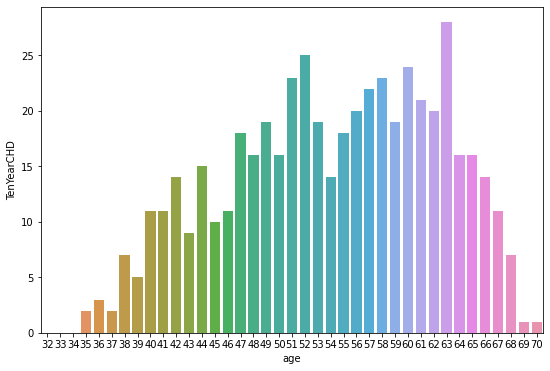

In [15]:
plt.figure(figsize=(9,6))
sns.barplot(x=age_risk.age,y=age_risk.TenYearCHD)
plt.show()

Remarks:
The highest number of people facing the risk of CHD are of the age 63.
Let's further break this down by gender.

##Gender and risk of CHD

In [16]:
sex_risk=df.groupby('sex')['TenYearCHD'].sum() #crearing df grouped by sex and risk of CHD
sex_risk

sex
F    239
M    272
Name: TenYearCHD, dtype: int64

We see that ratio of male and females facing the risk of CHD are quite equally proportionate.

In [17]:
#Lookign into CHD risk by gender, grouped by age.
male_risk=df[df.sex=='M'].groupby('age')['TenYearCHD'].sum().reset_index()
female_risk=df[df.sex=='F'].groupby('age')['TenYearCHD'].sum().reset_index()

Text(0, 0.5, 'Number of people facing risk of CHD')

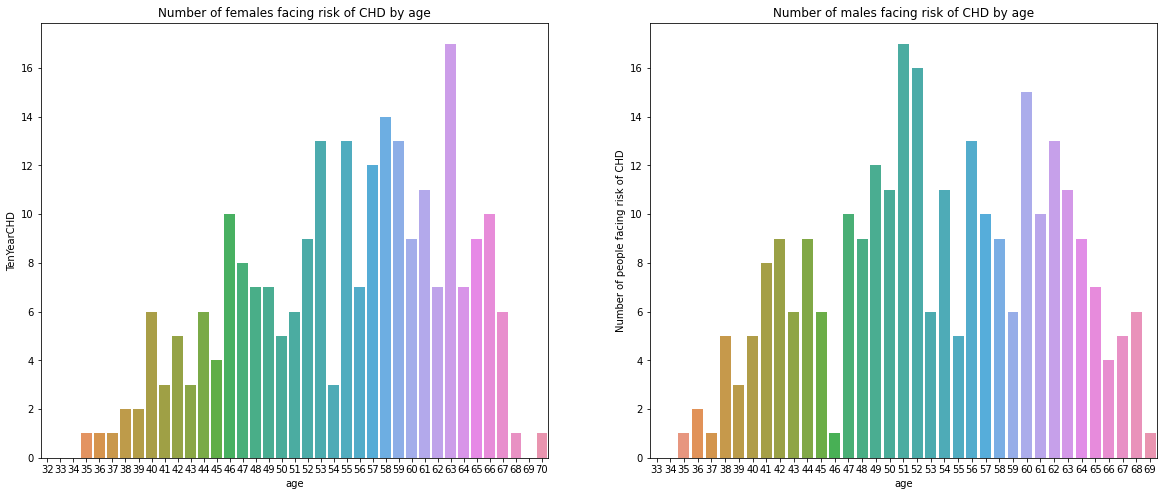

In [18]:
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))

#first sublot exclusive of females
ax=sns.barplot(x=female_risk.age,y=female_risk.TenYearCHD,ax=axes[0])
ax.set_title('Number of females facing risk of CHD by age')
plt.ylabel('Number of people facing risk of CHD')
#  sublot exclusive of females
ax=sns.barplot(x=male_risk.age,y=male_risk.TenYearCHD,ax=axes[1])
ax.set_title('Number of males facing risk of CHD by age')
plt.ylabel('Number of people facing risk of CHD')

Remarks:
The distribution is quite similar,
The female distribution peaks at a later stage; at age of 63 while male distribution peaks at 51.

##Cigarettes and risk of CHD

In [19]:
cig_risk=df.groupby('cigsPerDay')['TenYearCHD'].sum().reset_index()

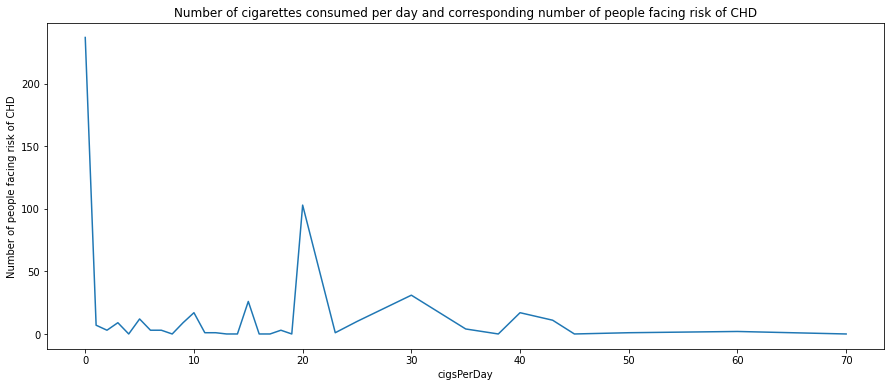

In [20]:
plt.figure(figsize=(15,6))
sns.lineplot(x=cig_risk.cigsPerDay,y=cig_risk.TenYearCHD)
plt.ylabel('Number of people facing risk of CHD')
plt.title('Number of cigarettes consumed per day and corresponding number of people facing risk of CHD')
plt.show()

Now this is interesting. There is a high concentration of people with risk of CHD at cigsPerDay=0. 
But that;s due to high number of people in that category. Similarly, the risk count is low in people smoking high amount of cigsPerDay, probably because the number is so low.
let's look into the number of people facing the risk by grouping it by whether they smoke or not.

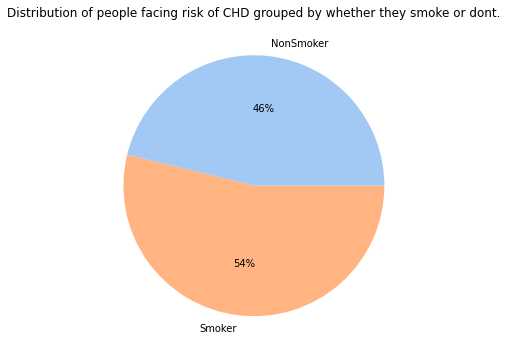

In [21]:
cig_risk2=df.groupby('is_smoking')['TenYearCHD'].sum().reset_index() #grouping by smoking characterestics and risk of CHD.
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel')[0:5]
plt.title('Distribution of people facing risk of CHD grouped by whether they smoke or dont.')
plt.pie(cig_risk2['TenYearCHD'],labels=['NonSmoker','Smoker'],colors = colors, autopct='%.0f%%')
plt.show()

So the number of people facing risk of CHD are more amongst those who do smoke. But it's interesting to note that a sizeable number of non smoker face similar risk too. This must mean there should be other much more influential factors contributing to CHD.


##BP medication and risk of CHD

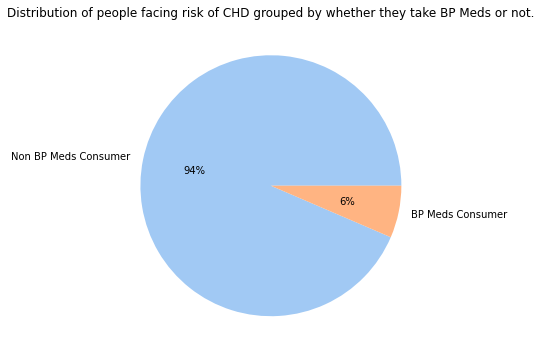

In [22]:
bpmeds_risk=df.groupby('BPMeds')['TenYearCHD'].sum().reset_index() #grouping by whether patient takes bpMeds or not.
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel')[0:5]
plt.title('Distribution of people facing risk of CHD grouped by whether they take BP Meds or not.')
plt.pie(bpmeds_risk['TenYearCHD'],labels=['Non BP Meds Consumer','BP Meds Consumer'],colors = colors, autopct='%.0f%%')
plt.show()

We can see that only 6% of those facing risk of CHD consume BP Meds. So this is unlikey to be a influencing factor too.

##Does presence of prevalent stroke indicate the person is still under risk?

In [23]:
prevalentstroke_risk=df.groupby('prevalentStroke')['TenYearCHD'].sum().reset_index() #grouping by whether patient have had stroke previously
prevalentstroke_risk

,prevalentStroke,TenYearCHD
0,0,501
1,1,10


Surprisingly only 10 people who have had prevalent strokes are still under the risk of CHD. 501 people who are under risk of CHD haven't had an attack yet.


##Cholestrol level distribution accross age

In [24]:
chol_age=df.groupby('age')['totChol'].mean().reset_index()#grouping by age and average totChol values
chol_age

,age,totChol
0,32,242.000000
1,33,182.250000
2,34,197.750000
3,35,214.586207
4,36,207.440000
5,37,215.356164
6,38,213.697479
7,39,222.568345
8,40,217.148649
9,41,222.909722


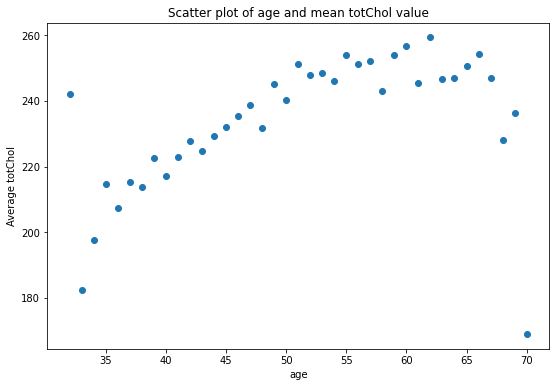

In [25]:
plt.figure(figsize=(9,6))
plt.title('Scatter plot of age and mean totChol value')
plt.xlabel('age')
plt.ylabel('Average totChol')
plt.scatter(chol_age.age,chol_age.totChol)
plt.show()

We can see that age and cholestrol level are possitively correlated. There are a few outliers too.

##BMI distribution across ages.

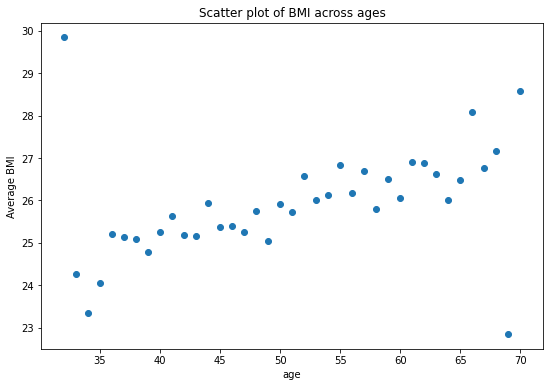

In [26]:
bmi_age=df.groupby('age')['BMI'].mean().reset_index()
plt.figure(figsize=(9,6))
plt.xlabel('age')
plt.ylabel('Average BMI')
plt.title('Scatter plot of BMI across ages')
plt.scatter(x=bmi_age.age,y=bmi_age.BMI)
plt.show()

We see that higher BMI or obesity is observed more in older population.

#Outlier Removal

Let's sort our numerical features out first

In [27]:
numerical_features=[feat for feat in df.describe(include=np.number).columns if feat not in ['TenYearCHD']]
numerical_features

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

Let's plot boxplots to visualise the outliers

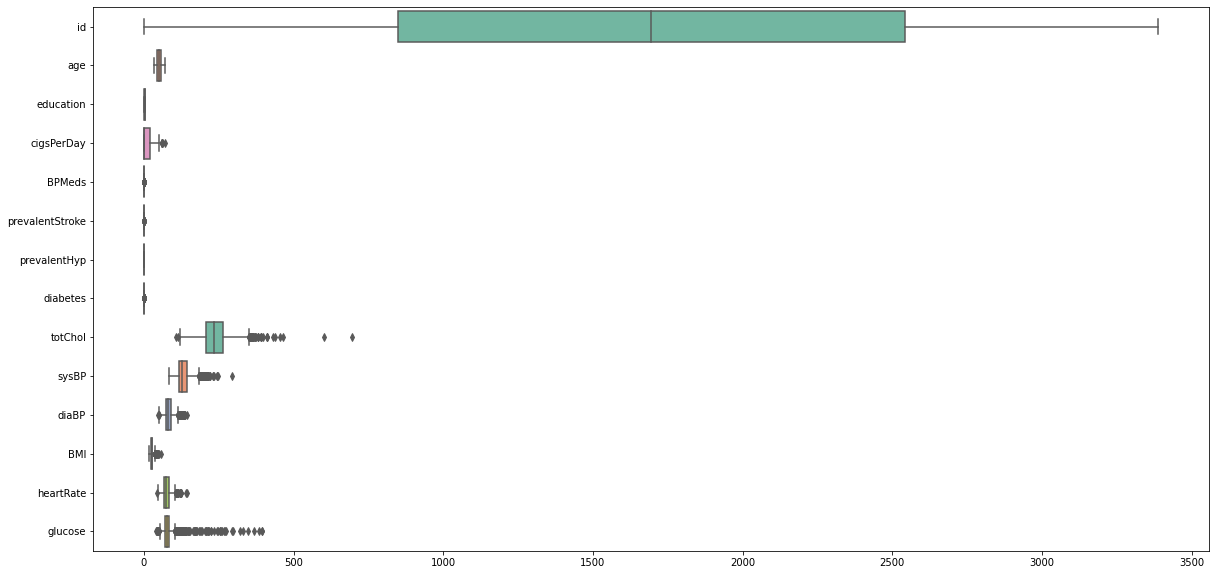

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[numerical_features],orient='h',palette='Set2')
  
plt.show()



We've got some fields with ouliers, in hand. Following are the fields where we've detected considerable amount of outliers in:

glucose

heartRate

BMI

diaBP

sysBP

totChol

cigsPerDay

I'll choose to leave out heartrate and glucose out of oulier removal process here, since I feel the distribution of oultier is quite uniform, and large, indicating presence of a pattern that I don't want to strip the model off.

I'll use the IQR method to filter out the outliers.

In [29]:
#we'll make a copy of the dataframe before we reomve the outliers
df_pr=df.copy()
df_pr.shape

(3390, 17)

In [30]:
outlier_cols=['cigsPerDay','sysBP','diaBP','BMI','totChol'] #creating list of columns with outliers

In [31]:
for col in outlier_cols:
  q1=df_pr[col].quantile(0.25) #25th percentile: q1
  q3=df_pr[col].quantile(0.75) # 75th percentile: q3
  
  iqr=q3-q1 #interquartile range: q3-q1

  lower_limit=q1-(1.5*iqr) # lower limit
  upper_limit=q3+(1.5*iqr) #upper_limit

#replacing outliers with lower or upper limit valeus accordingly.
  df_pr[col].loc[(df_pr[col]>upper_limit)]=upper_limit
  df_pr[col].loc[(df_pr[col]<lower_limit)]=lower_limit


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


We've replaced the outliers with upper or lower limit values accordingly.

#Encoding Categorical Features
Let's have a look at our categorical features

In [32]:
categorical_features=df_pr.describe(exclude=np.number).columns #extractign categorical features
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

We'll have to encode these features. Since they are binary features, I'll use label encoding.

In [33]:
df_pr['sex']=df_pr['sex'].apply(lambda x: 1 if x=='M' else 0) # 1 would signify male and 0 female
df_pr['is_smoking']=df_pr['is_smoking'].apply(lambda x: 1 if x=='YES' else 0) #1 would signify that the person is smoking and 0 would signify they are not.

#Correlation between features and feature selection

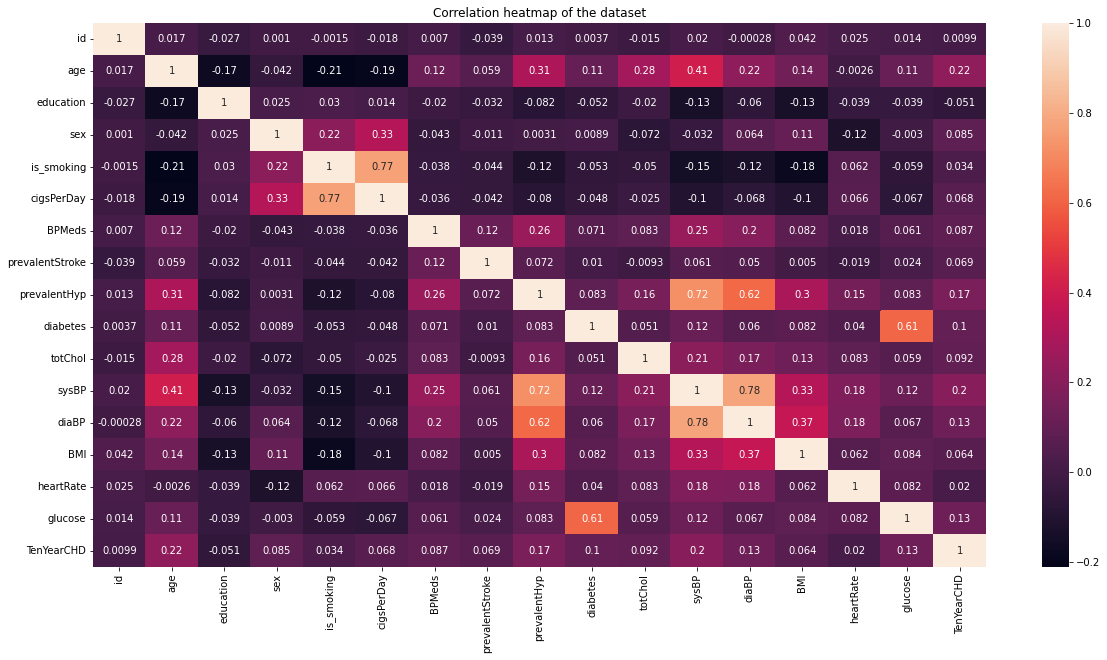

In [34]:
plt.figure(figsize=(20,10))
plt.title('Correlation heatmap of the dataset')
sns.heatmap(df_pr.corr(),annot=True)
plt.show()

Let's remove features that are uncorrelated with our target variable. I'll be removing any feature with less than 5% correlation with the target variable.
Which are: id, is_smoking, and heartRate.

We don't see many instances of multicolinearity in the dataset, except for 0.78 correlation of 'is_smoking' with 'cigsPerDay', which is quite obvious. And 0.78 correlation of diaBP with sysBP. is_smoking has already been removed owing to low correlatio with the target variable. I'll remove diaBP from the dataset since it has lower correlation than sysBP, with our target variable.

Note: I did try out VIF analysis to see if multicolinearity can be further removed. But it resulted in removal of many more features that I believe are crucial to the model, and can be utilised by models that do not assume absence of multicolinearity like Random Forest Classifier.

In [35]:
feature_to_remove=['id','is_smoking','heartRate','diaBP','TenYearCHD'] #creating list of features to be removed.

We are down to 12 independent variables now.
Let's form dataframes for dependent and independent features.

#Data Preparation

In [36]:
#importing libraries for data processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate 

#libraries required for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import  precision_score, recall_score, roc_auc_score, roc_curve,auc

In [37]:
#defining dependen and independent features.
dependent_feature=['TenYearCHD'] 
independent_features=[i for i in df_pr.columns if i not in feature_to_remove ]

In [38]:
#storing independent and dependent features in X and Y
x=df_pr[independent_features]
y=df_pr[dependent_feature]

In [39]:
print("shape of x: ",x.shape)
print("shape of y: ",y.shape)

shape of x:  (3390, 12)
shape of y:  (3390, 1)


In [40]:
#let's use SMOTE to oversample the data to deal with imbalance.
from imblearn.over_sampling import SMOTE
smote=SMOTE()

x,y=smote.fit_resample(x,y)

In [41]:
print("shape of oversampled x: ",x.shape)
print("shape of oversampled y: ",y.shape)

shape of oversampled x:  (5758, 12)
shape of oversampled y:  (5758, 1)


So as we can see oversampling has increased the number of samples by 2368

In [42]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [43]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (4606, 12)
y_train shape: (4606, 1)
x_test shape: (1152, 12)
y_test shape: (1152, 1)


In [44]:
# Since the measurements of different features are different ranges, we need to scale the data to bring all features in comparable range
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [45]:
x_test

array([[0.51351351, 0.33333333, 1.        , ..., 0.33663366, 0.60650375,
        0.16101695],
       [0.48648649, 0.08998819, 0.        , ..., 0.99571773, 0.66862603,
        0.14987323],
       [0.59459459, 0.66713049, 0.        , ..., 0.19299353, 0.37017098,
        0.09888185],
       ...,
       [0.81081081, 0.33333333, 1.        , ..., 0.65346535, 0.48540825,
        0.11299435],
       [0.78378378, 0.        , 0.        , ..., 0.80770357, 0.61802082,
        0.15451526],
       [0.21621622, 0.33333333, 0.        , ..., 0.46039604, 0.20627285,
        0.10169492]])

#Model Implementation

##Implimentor function
Let's define a function that runs specified model on our training set

In [46]:
#Let's formulate a function to impliment calssification models.

def implimentor(classifier):

  ''' This function returns a dictionary with parameters of specified model'''
 
  model_dict={} #initiating empty dictionary
  classifier.fit(x_train,np.ravel(y_train,order='C')) #fitting model on training set
  
  x_pred_test=classifier.predict(x_test)
  x_pred_train=classifier.predict(x_train) #predicting on train and test set
  test_proba=classifier.predict_proba(x_test)
  test_proba=test_proba[:,1]
  
  #storing results in dictionary
  model_dict['x_pred_test']=x_pred_test
  model_dict['x_pred_train']=x_pred_train
  model_dict['test_proba']=test_proba
  model_dict['model']=classifier
  model_dict['training_accuracy']=accuracy_score(y_train,x_pred_train)
  model_dict['testing_accuracy']=accuracy_score(y_test,x_pred_test)
  model_dict['classification_report']=classification_report(y_test,x_pred_test)
  model_dict['conf_matrix']=pd.DataFrame(confusion_matrix(y_test,x_pred_test))
  model_dict['roc_auc_score']=roc_auc_score(y_test,x_pred_test)

  return model_dict


  

Since the dataset is quite small, we do have the liberty to run multiple models and compare.

##Logistic Regression
We'll start off with a simple logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression # importing logistic regression 
logistic_classifier=LogisticRegression() #inititiating instance 
lr_classifier_result=implimentor(logistic_classifier) #using implimentor function

In [48]:
#prinitng results
print('training accuracy: ', lr_classifier_result['training_accuracy'],'\n')
print('testing accuracy: ', lr_classifier_result['testing_accuracy'],'\n')
print("Classification Report:\n\n", lr_classifier_result['classification_report'],'\n')
print("confusion matrix \n",lr_classifier_result['conf_matrix'],'\n')
print("roc_auc_score: ", lr_classifier_result['roc_auc_score'])

training accuracy:  0.6691272253582284 

testing accuracy:  0.6848958333333334 

Classification Report:

               precision    recall  f1-score   support

           0       0.72      0.62      0.67       589
           1       0.66      0.75      0.70       563

    accuracy                           0.68      1152
   macro avg       0.69      0.69      0.68      1152
weighted avg       0.69      0.68      0.68      1152
 

confusion matrix 
      0    1
0  368  221
1  142  421 

roc_auc_score:  0.6862837636117453


The logistic regression model hasn't performed very well.
Most probably because multicolinearity still exists in the dataset. But I believe stripping the model off of more features is not ideal, since it will deprive other models of the opportunity to perform well.

We should look into models that do not assume multicolinearity.

##Random Forest Classifier


In [49]:
from sklearn.ensemble import RandomForestClassifier# importing logistic regression
rf_classifier=RandomForestClassifier()#inititiating instance
rf_classifier_result=implimentor(rf_classifier)#using implimentor function

In [50]:
print('training accuracy: ', rf_classifier_result['training_accuracy'],'\n')
print('testing accuracy: ', rf_classifier_result['testing_accuracy'],'\n')
print("Classification Report:\n\n", rf_classifier_result['classification_report'],'\n')
print("confusion matrix \n",rf_classifier_result['conf_matrix'],'\n')
print("roc_auc_score: ", rf_classifier_result['roc_auc_score'])

training accuracy:  1.0 

testing accuracy:  0.8819444444444444 

Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.89      0.88       589
           1       0.88      0.88      0.88       563

    accuracy                           0.88      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.88      0.88      0.88      1152
 

confusion matrix 
      0    1
0  523   66
1   70  493 

roc_auc_score:  0.8818058726142693


As expected, Random Forest has performed very well. 
Let's see if any other model is able to beat this.

##K Nearest Neighbours

In [51]:
from sklearn.neighbors import KNeighborsClassifier #imporing KNN
kn_classifier=KNeighborsClassifier()#inititaing instance
kn_classifier_result=implimentor(kn_classifier)#using implimentor function

In [52]:
print('training accuracy: ', kn_classifier_result['training_accuracy'],'\n')
print('testing accuracy: ', kn_classifier_result['testing_accuracy'],'\n')
print("Classification Report:\n\n", kn_classifier_result['classification_report'],'\n')
print("confusion matrix \n",kn_classifier_result['conf_matrix'],'\n')
print("roc_auc_score: ", kn_classifier_result['roc_auc_score'])

training accuracy:  0.855840208423795 

testing accuracy:  0.7230902777777778 

Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.63      0.70       589
           1       0.68      0.82      0.74       563

    accuracy                           0.72      1152
   macro avg       0.73      0.73      0.72      1152
weighted avg       0.73      0.72      0.72      1152
 

confusion matrix 
      0    1
0  369  220
1   99  464 

roc_auc_score:  0.725320937133414


KNN has performed decently well, but not at par with Random Forest

##Naive Bayes Classifier


In [53]:
from sklearn.naive_bayes import GaussianNB
nb_classifier=GaussianNB()
nb_classifier_result=implimentor(nb_classifier)

In [54]:
print('training accuracy: ', nb_classifier_result['training_accuracy'],'\n')
print('testing accuracy: ', nb_classifier_result['testing_accuracy'],'\n')
print("Classification Report:\n\n", nb_classifier_result['classification_report'],'\n')
print("confusion matrix \n",nb_classifier_result['conf_matrix'],'\n')
print("roc_auc_score: ", nb_classifier_result['roc_auc_score'])

training accuracy:  0.6005210594876248 

testing accuracy:  0.6267361111111112 

Classification Report:

               precision    recall  f1-score   support

           0       0.59      0.86      0.70       589
           1       0.73      0.38      0.50       563

    accuracy                           0.63      1152
   macro avg       0.66      0.62      0.60      1152
weighted avg       0.66      0.63      0.60      1152
 

confusion matrix 
      0    1
0  508   81
1  349  214 

roc_auc_score:  0.6212926747625955


Naive Bayes has failed miserably as well.

##Hyperparameter Tuning

Here I'll tune the hyperparameters of my best 2 models: Random Forest Classifier and K Nearest Neighbours to see if we can bring about any improvement.

###Random Forest Hyperparameter Tuning

In [55]:
#For sake computational time we'll use random search CV
from sklearn.model_selection import RandomizedSearchCV

In [56]:
#Defining parameter test range
grid={
 'bootstrap': [True, False],
 'max_depth': [10, 40, 50, 60,  90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 800, 1000, 1200]
 }

In [57]:
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1) #creating instance of RandimizedSearchCV

In [58]:
rf_random_result=implimentor(rf_random)#using implimentor function

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [59]:
#best parameters are as follows:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [60]:
#printing results
print('training accuracy: ', rf_random_result['training_accuracy'],'\n')
print('testing accuracy: ', rf_random_result['testing_accuracy'],'\n')
print("Classification Report:\n\n", rf_random_result['classification_report'],'\n')
print("confusion matrix \n",rf_random_result['conf_matrix'],'\n')
print("roc_auc_score: ", rf_random_result['roc_auc_score'])

training accuracy:  1.0 

testing accuracy:  0.8880208333333334 

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.89      0.89       589
           1       0.89      0.88      0.89       563

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152
 

confusion matrix 
      0    1
0  526   63
1   66  497 

roc_auc_score:  0.8879049597867354


In [61]:
rf_classifier_result.items()

dict_items([('x_pred_test', array([0, 1, 1, ..., 0, 1, 0])), ('x_pred_train', array([1, 0, 0, ..., 1, 1, 0])), ('test_proba', array([0.23, 0.97, 0.54, ..., 0.46, 0.93, 0.43])), ('model', RandomForestClassifier()), ('training_accuracy', 1.0), ('testing_accuracy', 0.8819444444444444), ('classification_report', '              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.88       589\n           1       0.88      0.88      0.88       563\n\n    accuracy                           0.88      1152\n   macro avg       0.88      0.88      0.88      1152\nweighted avg       0.88      0.88      0.88      1152\n'), ('conf_matrix',      0    1
0  523   66
1   70  493), ('roc_auc_score', 0.8818058726142693)])

Hyperparameter tuning has helped us to improve the performance of random forest classifier by a decent margin.

###KNN Hyper Parameter Tuning

In [62]:
#Defining parameter test range
grid={
    'leaf_size':list(range(1,50)),
    'n_neighbors':list(range(1,30)),
    'p':[1,2]
}

In [63]:
kn_random = RandomizedSearchCV(estimator = kn_classifier, param_distributions = grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1) #crearing instance of randomized search CV

In [64]:
kn_random_result=implimentor(kn_random)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [65]:
print('training accuracy: ', kn_random_result['training_accuracy'],'\n')
print('testing accuracy: ', kn_random_result['testing_accuracy'],'\n')
print("Classification Report:\n\n", kn_random_result['classification_report'],'\n')
print("confusion matrix \n",kn_random_result['conf_matrix'],'\n')
print("roc_auc_score: ", kn_random_result['roc_auc_score'])

training accuracy:  0.9009986973512809 

testing accuracy:  0.7734375 

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.79      0.78       589
           1       0.78      0.75      0.76       563

    accuracy                           0.77      1152
   macro avg       0.77      0.77      0.77      1152
weighted avg       0.77      0.77      0.77      1152
 

confusion matrix 
      0    1
0  467  122
1  139  424 

roc_auc_score:  0.7729888090420287


In [66]:
#following are the nest parameters
kn_random.best_params_

{'leaf_size': 7, 'n_neighbors': 4, 'p': 1}

The performance of KNN calssifier has improved upon hyperparameter tuning as well. But it still is not par with Random Forest classifier.

##Visualising ROC curve.


In [67]:
rf_curve=roc_curve(y_test,rf_random_result['test_proba']) #Using tuned hyperparameters
lr_curve=roc_curve(y_test,lr_classifier_result['test_proba'])
kn_curve=roc_curve(y_test,kn_random_result['test_proba'])#Using tuned hyperparameters
nb_curve=roc_curve(y_test,nb_classifier_result['test_proba'])

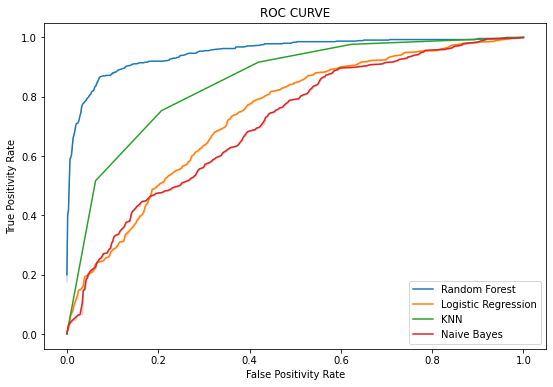

In [68]:
#Plotting ROC curve of all the 4 models.
plt.figure(figsize=(9,6))
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')
sns.lineplot(x=rf_curve[0],y=rf_curve[1],label='Random Forest')
sns.lineplot(x=lr_curve[0],y=lr_curve[1],label='Logistic Regression')
sns.lineplot(x=kn_curve[0],y=kn_curve[1],label='KNN')
sns.lineplot(x=nb_curve[0],y=nb_curve[1],label='Naive Bayes')

#Model explanation

Here we'll look into our best model: Random Forest Classisfier using SHAP explainer to derive out some explanation behind the model's functioning.


In [69]:
#installing shap package
!pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


In [70]:
#importing shap
import shap

In [71]:
#creating instance
shap_explainer=shap.TreeExplainer(rf_classifier)
shap_score=shap_explainer.shap_values(x_test)

#creating a independent feature df
feature_df=pd.DataFrame(x_test,columns=independent_features)


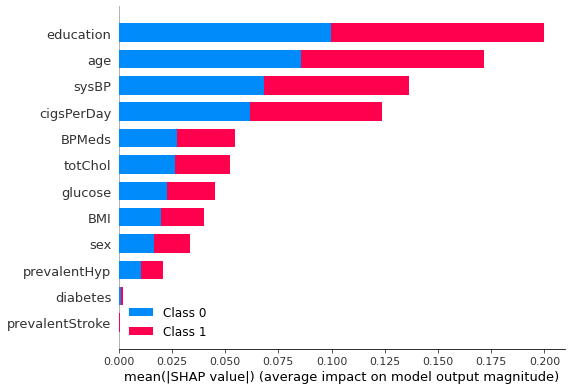

In [72]:
shap.summary_plot(shap_score,feature_df)

#Summary

To summarize the whole project:

The task was to determine if a given patient is under the risk CHD in coming 10 years. 
To do this, following features were at our disposal:
 
 'id'

 'age',
 
 'education',
 
 'sex',
 
 'cigsPerDay',
 
 'BPMeds',
 
 'prevalentStroke',
 
 'prevalentHyp',
 
 'diabetes',
 
 'totChol',
 
 'sysBP',
 
 'BMI',
 
 'glucose'
 
 'is_smoking'
 
 'heartRate'
 
 'diaBP'
 
 'TenYearCHD'

Following steps were followed to build the model:

1. Dataset was cleaned off the null values.
2. Outliers were replaced with upper limit and lower limit values as applicable.
3. Imbalance in the classes were fixed using SMOTE.
4. Categorical features were encoded
5. Feature selection was done by inspecting correlation between features and aforementioned features were finalised.
6. The data was split to train and test and scaled using MinMaxScaler.
7. Following 4 models were implimented on the training set:
  
  1. Logistic Regression
  2. Random Forest Classifier
  3. K Nearest Neighbours
  4. Niave Bayes Classifier.

The results of the models are tabularised below:

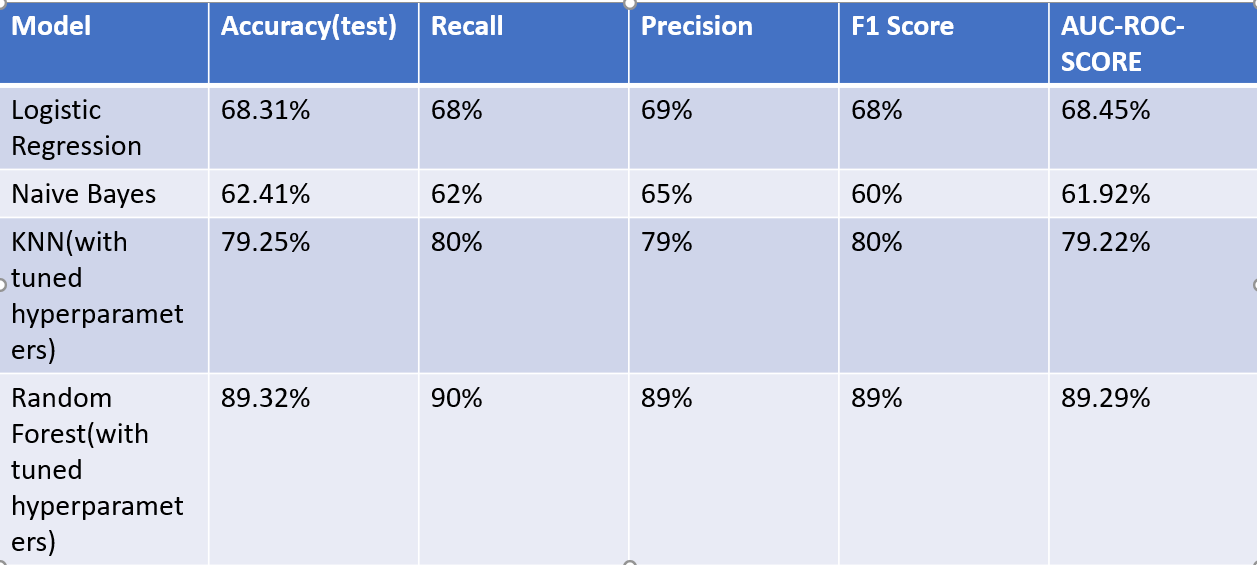

Using Shapley analysis it was found that education, age, cigsPerDay, sysBP, and totChol were top 5 most inlfuential factors in determination of whether the patient is facing the risk of CHD or not.

I personally do not clearly understand how education topped the list. A plausible explanation could be that ones education may go on to define the lifestyle they would follow, ultimately governing the risk of CHD.